In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib as mpl
from google.colab import drive
drive.mount('/content/drive')

mpl.font_manager.fontManager.addfont('/content/drive/My Drive/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=10, weight=150)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cbdf = pd.DataFrame()
cbdf = pd.read_excel('/content/drive/My Drive/Customer_Behaviors.xlsx', dtype={'คุณเกิดวันที่เท่าไหร่' : str})

print(cbdf.shape)
cbdf = cbdf[cbdf.columns[1:]]

(63, 64)


In [ ]:
from datetime import datetime

df = cbdf.copy()


int_cols = [ c.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','สนใจ') for c in df.columns[:30] ]
con_cols = [ c.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','บ่อย') for c in df.columns[30:60] ]
df.columns = int_cols + con_cols + ['interests', 'dob', 'gender']


intr_cattype = pd.CategoricalDtype(categories=['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด'], ordered=True)
cons_cattype = pd.CategoricalDtype(categories=['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน'], ordered=True)

for col in df.columns[:30]:
    df[col] = df[col].astype(intr_cattype)

for col in df.columns[30:60]:
    df[col] = df[col].astype(cons_cattype)


df['gender'] = df['gender'].map({'หญิง':'F', 'ชาย':'M', 'ไม่ต้องการระบุ': np.nan})


df['year'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[0]))
df['year'] = df['year'].apply(lambda x: x if x < 2500 else x - 543)
df['month'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[1]))
df['day'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[2]))

df['dob'] = pd.to_datetime(df[['year','month','day']])
df['age'] = df['year'].apply(lambda x: datetime.now().year - x if x < 2010 else np.nan)
df['age_group'] = pd.cut(df['age'], bins=[0,28,32,36,99], right=False, labels=['Below 28','28 - 31', '32 - 35','36+'])

df.drop(['year','month','day'], axis=1, inplace=True)

In [ ]:
df.head(2)

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง],บ่อย [อาหารญี่ปุ่น],บ่อย [อาหารจึน],บ่อย [อาหารไทย],บ่อย [อาหารอีสาน],บ่อย [อาหารสุขภาพ],บ่อย [บุฟเฟต์],บ่อย [ชาบูชาบู],บ่อย [ปิ้งย่าง],บ่อย [เหล้าเบียร์],บ่อย [เสื้อผ้าแฟชั่น],บ่อย [แต่งหน้า],บ่อย [skincare บำรุงผิว],บ่อย [การออกกำลังกาย],บ่อย [การเล่นเกมส์],บ่อย [การท่องเที่ยว],บ่อย [การอ่านหนังสือ],บ่อย [การอ่านบทความ Online],บ่อย [การเรียน e-learning],บ่อย [ดู Series],บ่อย [ดูหนัง],บ่อย [ดู Youtube],บ่อย [ดู Netflix],บ่อย [Content ด้านบันเทิง],บ่อย [Content เกี่่ยวกับเกมส์],บ่อย [Content เกี่ยวกับการ review ร้านอาหาร],บ่อย [Content เกี่ยวกับการท่องเที่ยว],บ่อย [Content เกี่ยวกับการแต่งบ้าน],บ่อย [Content เกี่ยวกับการโทรทัศน์],บ่อย [Content เกี่ยวกับละคร],บ่อย [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31


In [ ]:
df.to_pickle('01_data_prep.pkl')

In [ ]:
intr_scale = ['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด']
cons_scale = ['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน']

In [ ]:
df = pd.read_pickle('01_data_prep.pkl')
df.shape

(63, 65)

In [ ]:
df[df.isna().any(axis=1)]
df.head(2)

,สนใจ [อาหารญี่ปุ่น],สนใจ [อาหารจึน],สนใจ [อาหารไทย],สนใจ [อาหารอีสาน],สนใจ [อาหารสุขภาพ],สนใจ [บุฟเฟต์],สนใจ [ชาบูชาบู],สนใจ [ปิ้งย่าง],สนใจ [เหล้าเบียร์],สนใจ [เสื้อผ้าแฟชั่น],สนใจ [แต่งหน้า],สนใจ [skincare บำรุงผิว],สนใจ [การออกกำลังกาย],สนใจ [การเล่นเกมส์],สนใจ [การท่องเที่ยว],สนใจ [การอ่านหนังสือ],สนใจ [การอ่านบทความ Online],สนใจ [การเรียน e-learning],สนใจ [ดู Series],สนใจ [ดูหนัง],สนใจ [ดู Youtube],สนใจ [ดู Netflix],สนใจ [Content ด้านบันเทิง],สนใจ [Content เกี่่ยวกับเกมส์],สนใจ [Content เกี่ยวกับการ review ร้านอาหาร],สนใจ [Content เกี่ยวกับการท่องเที่ยว],สนใจ [Content เกี่ยวกับการแต่งบ้าน],สนใจ [Content เกี่ยวกับการโทรทัศน์],สนใจ [Content เกี่ยวกับละคร],สนใจ [Content เกี่ยวกับการเมือง],บ่อย [อาหารญี่ปุ่น],บ่อย [อาหารจึน],บ่อย [อาหารไทย],บ่อย [อาหารอีสาน],บ่อย [อาหารสุขภาพ],บ่อย [บุฟเฟต์],บ่อย [ชาบูชาบู],บ่อย [ปิ้งย่าง],บ่อย [เหล้าเบียร์],บ่อย [เสื้อผ้าแฟชั่น],บ่อย [แต่งหน้า],บ่อย [skincare บำรุงผิว],บ่อย [การออกกำลังกาย],บ่อย [การเล่นเกมส์],บ่อย [การท่องเที่ยว],บ่อย [การอ่านหนังสือ],บ่อย [การอ่านบทความ Online],บ่อย [การเรียน e-learning],บ่อย [ดู Series],บ่อย [ดูหนัง],บ่อย [ดู Youtube],บ่อย [ดู Netflix],บ่อย [Content ด้านบันเทิง],บ่อย [Content เกี่่ยวกับเกมส์],บ่อย [Content เกี่ยวกับการ review ร้านอาหาร],บ่อย [Content เกี่ยวกับการท่องเที่ยว],บ่อย [Content เกี่ยวกับการแต่งบ้าน],บ่อย [Content เกี่ยวกับการโทรทัศน์],บ่อย [Content เกี่ยวกับละคร],บ่อย [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31


In [ ]:
df.dropna(inplace=True)
df['age'] = df['age'].astype(int)

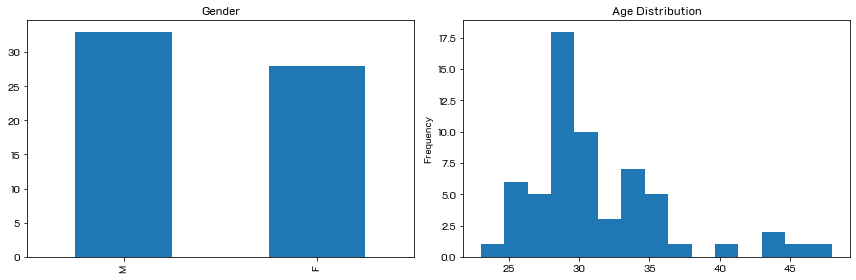

In [ ]:
f, axes = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

df['gender'].value_counts(dropna=False).plot(kind='bar', title='Gender', ax=axes[0])
df['age'].plot.hist(bins=15, title='Age Distribution', ax=axes[1])
# df.groupby(['age_group','gender']).size().unstack().fillna(0).plot(kind='barh', xlabel='Age Group', ylabel='Number of Respondents', 
#                                                                    title='Number of Respondents', ax=axes[2]);
plt.savefig('demographic.png',dpi=100)
plt.show()

In [ ]:
lst = list(df.columns.values)

In [ ]:
#Interest
#Overall
alldf = df
alldf = alldf[lst[:-35]]

#Male
mdf = df[df['gender']=='M']
mdf = mdf[lst[:-35]]

#Female
fdf = df[df['gender']=='F']
fdf = fdf[lst[:-35]]

In [ ]:
def percent_interest (df):
  dfnew = pd.DataFrame({'Level':intr_scale})
  dfnew = dfnew.set_index('Level')
  dfnew[lst[:-35]] = np.nan

  for row in intr_scale:
    for col in lst[:-35]:
      dfnew.at[row, col] = round(np.sum(df[col]==row)/len(df),2)
  return dfnew

alldfPer = percent_interest(alldf)
mdfPer = percent_interest(mdf)
fdfPer = percent_interest(fdf)

[Text(0.5, 0, 'สนใจ [อาหารญี่ปุ่น]'),
 Text(1.5, 0, 'สนใจ [อาหารจึน]'),
 Text(2.5, 0, 'สนใจ [อาหารไทย]'),
 Text(3.5, 0, 'สนใจ [อาหารอีสาน]'),
 Text(4.5, 0, 'สนใจ [อาหารสุขภาพ]'),
 Text(5.5, 0, 'สนใจ [บุฟเฟต์]'),
 Text(6.5, 0, 'สนใจ [ชาบูชาบู]'),
 Text(7.5, 0, 'สนใจ [ปิ้งย่าง]'),
 Text(8.5, 0, 'สนใจ [เหล้าเบียร์]'),
 Text(9.5, 0, 'สนใจ [เสื้อผ้าแฟชั่น]'),
 Text(10.5, 0, 'สนใจ [แต่งหน้า]'),
 Text(11.5, 0, 'สนใจ [skincare บำรุงผิว]'),
 Text(12.5, 0, 'สนใจ [การออกกำลังกาย]'),
 Text(13.5, 0, 'สนใจ [การเล่นเกมส์]'),
 Text(14.5, 0, 'สนใจ [การท่องเที่ยว]'),
 Text(15.5, 0, 'สนใจ [การอ่านหนังสือ]'),
 Text(16.5, 0, 'สนใจ [การอ่านบทความ Online]'),
 Text(17.5, 0, 'สนใจ [การเรียน e-learning]'),
 Text(18.5, 0, 'สนใจ [ดู Series]'),
 Text(19.5, 0, 'สนใจ [ดูหนัง]'),
 Text(20.5, 0, 'สนใจ [ดู Youtube]'),
 Text(21.5, 0, 'สนใจ [ดู Netflix]'),
 Text(22.5, 0, 'สนใจ [Content ด้านบันเทิง]'),
 Text(23.5, 0, 'สนใจ [Content เกี่่ยวกับเกมส์]'),
 Text(24.5, 0, 'สนใจ [Content เกี่ยวกับการ review ร้านอาหาร]'),
 Text(2

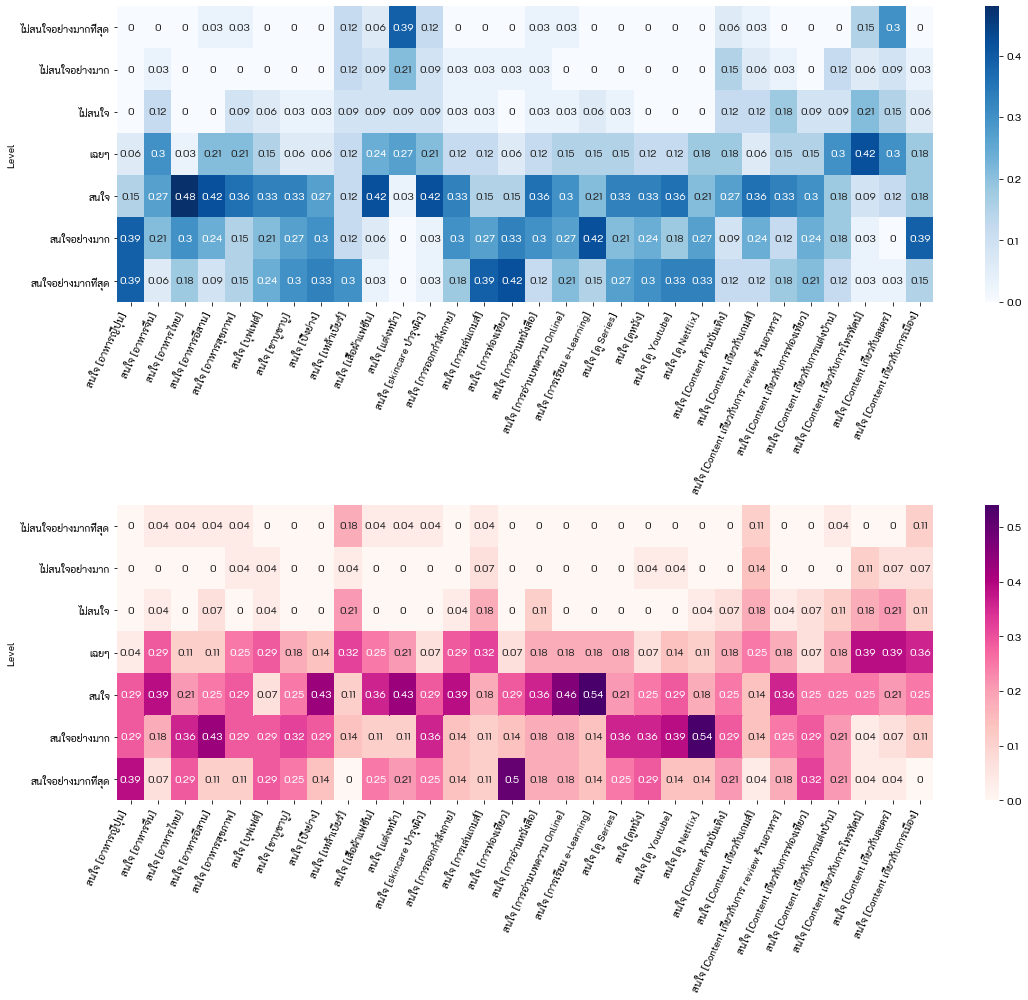

In [ ]:
plt.subplots(2,1, figsize=(16,14), tight_layout=True)

plt.subplot(2,1,1)
ax = sns.heatmap(mdfPer, annot=True, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')

plt.subplot(2,1,2)
ax = sns.heatmap(fdfPer, annot=True, cmap = 'RdPu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')

In [ ]:
#Consumption
#Overall
allcdf = df
allcdf = allcdf[lst[30:-5]]

#Male
mcdf = df[df['gender']=='M']
mcdf = mcdf[lst[30:-5]]

#Female
fcdf = df[df['gender']=='F']
fcdf = fcdf[lst[30:-5]]

In [ ]:
def percent_interest (df):
  dfnew = pd.DataFrame({'Level':cons_scale})
  dfnew = dfnew.set_index('Level')
  dfnew[lst[30:-5]] = np.nan

  for row in cons_scale:
    for col in lst[30:-5]:
      dfnew.at[row, col] = round(np.sum(df[col]==row)/len(df),2)
  return dfnew

allcdfPer = percent_interest(allcdf)
mcdfPer = percent_interest(mcdf)
fcdfPer = percent_interest(fcdf)

[Text(0.5, 0, 'บ่อย [อาหารญี่ปุ่น]'),
 Text(1.5, 0, 'บ่อย [อาหารจึน]'),
 Text(2.5, 0, 'บ่อย [อาหารไทย]'),
 Text(3.5, 0, 'บ่อย [อาหารอีสาน]'),
 Text(4.5, 0, 'บ่อย [อาหารสุขภาพ]'),
 Text(5.5, 0, 'บ่อย [บุฟเฟต์]'),
 Text(6.5, 0, 'บ่อย [ชาบูชาบู]'),
 Text(7.5, 0, 'บ่อย [ปิ้งย่าง]'),
 Text(8.5, 0, 'บ่อย [เหล้าเบียร์]'),
 Text(9.5, 0, 'บ่อย [เสื้อผ้าแฟชั่น]'),
 Text(10.5, 0, 'บ่อย [แต่งหน้า]'),
 Text(11.5, 0, 'บ่อย [skincare บำรุงผิว]'),
 Text(12.5, 0, 'บ่อย [การออกกำลังกาย]'),
 Text(13.5, 0, 'บ่อย [การเล่นเกมส์]'),
 Text(14.5, 0, 'บ่อย [การท่องเที่ยว]'),
 Text(15.5, 0, 'บ่อย [การอ่านหนังสือ]'),
 Text(16.5, 0, 'บ่อย [การอ่านบทความ Online]'),
 Text(17.5, 0, 'บ่อย [การเรียน e-learning]'),
 Text(18.5, 0, 'บ่อย [ดู Series]'),
 Text(19.5, 0, 'บ่อย [ดูหนัง]'),
 Text(20.5, 0, 'บ่อย [ดู Youtube]'),
 Text(21.5, 0, 'บ่อย [ดู Netflix]'),
 Text(22.5, 0, 'บ่อย [Content ด้านบันเทิง]'),
 Text(23.5, 0, 'บ่อย [Content เกี่่ยวกับเกมส์]'),
 Text(24.5, 0, 'บ่อย [Content เกี่ยวกับการ review ร้านอาหาร]'),
 Text(2

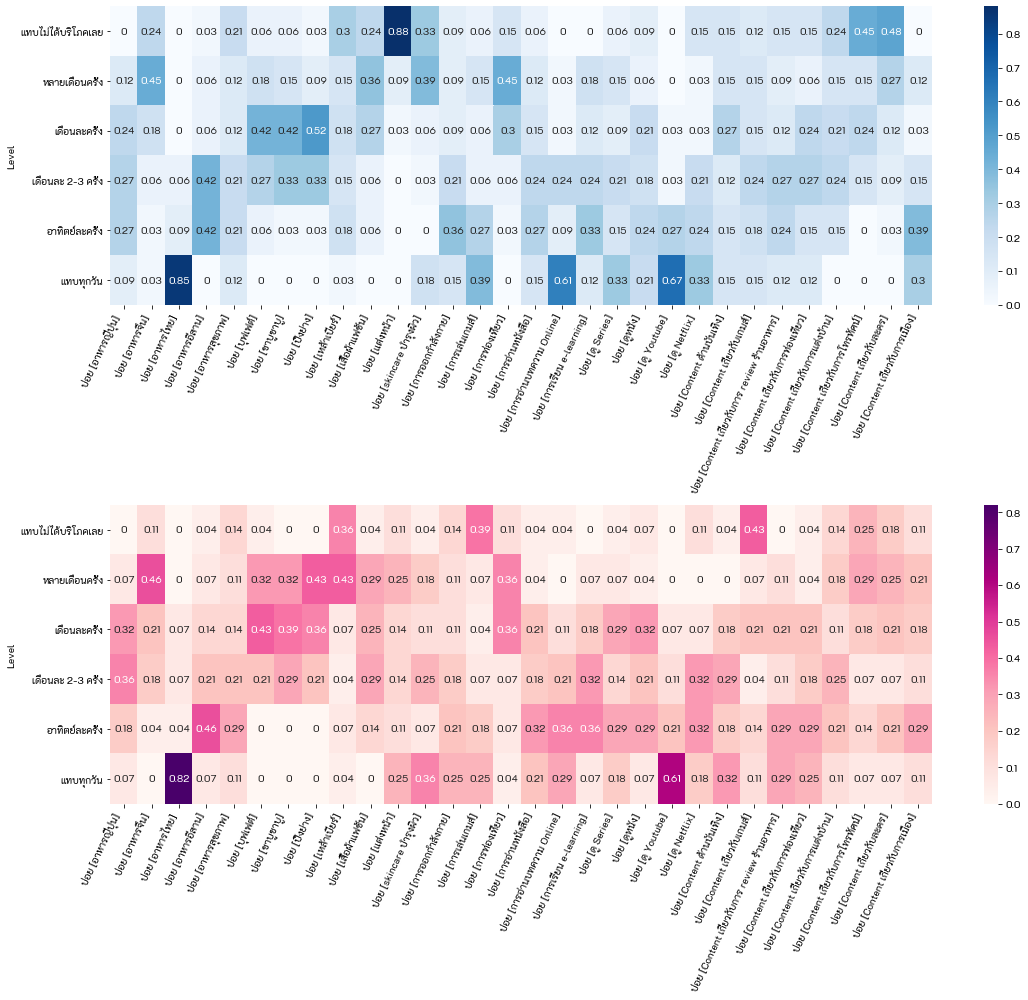

In [ ]:
plt.subplots(2,1, figsize=(16,14), tight_layout=True)

plt.subplot(2,1,1)
ax = sns.heatmap(mcdfPer, annot=True, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')

plt.subplot(2,1,2)
ax = sns.heatmap(fcdfPer, annot=True, cmap = 'RdPu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')